Funções Sigmoide e Softmax 
============================

As funções sigmoide e softmax são importantes, pois transformam valores ("scores", "logits") em probabilidades.
Nesse tutorial, iremos ver as definições dessas funções se relacionam e como elas variam conforme os parâmetros de entrada.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import * #Intsalar e setar no jupyter: jupyter nbextension enable --py widgetsnbextension


Sigmoide
===========

A função sigmoide tem a forma de um "S". Ela é definida pela seguinte equação:
$$S(x) = \frac{1}{1+e^{-x}}$$

Ela é uma função derivável cuja a derivada é dada por:
$$S'(x) = S(x)(1-S(x))$$

A função sigmoide é comumente em problemas de classificação com apenas duas classes.

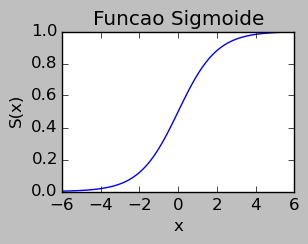

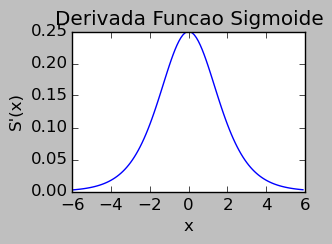

In [39]:
#Sigmoid function
def sigmoid(X):
    '''Compute the sigmoid function '''
    den = 1.0 + np.exp(-1.0 * X)
    d = 1.0 / den
    return d

#Pltando a função sigmoide
x1 = np.arange(-6,6,0.1)
S = sigmoid(x1)
plt.figure(figsize=(3,2))
plt.plot(x1,S)
plt.xlabel("x")
plt.ylabel("S(x)")
plt.title("Funcao Sigmoide")
plt.show()


#Plotando a derivada da função sigmoide
dS = S*(1-S) # Derivada da função sigmoide
plt.figure(figsize=(3,2))
plt.plot(x1,dS)
plt.xlabel("x")
plt.ylabel("S'(x)")
plt.title("Derivada Funcao Sigmoide")
plt.show()




Softmax
========

A função softmax transforma um conjunto de valores ("scores", "logits") e os transforma em probabilidades, de forma que a soma das probabilidades seja igual a 1. Ela é adequada para problemas de classificação com mais de uma classe.
$$softmax(\boldsymbol{x})_j = \frac{e^{x_j}}{\sum_{i=1}^{N}e^{x_i}}$$
$$\boldsymbol{x} = (x_1,x_2,...,x_N)$$

A função softmax também é derivável. As derivadas parcias são facilmente calculadas pela regra do quociente. A derivada parcial da função softmax é dada por:

$$\frac{\partial softmax}{\partial x_j} = \frac{e^{x_j}(\sum_{i=1}^{N}e^{x_i}) - (e^{x_j})^2)}{(\sum_{i=1}^{N}e^{x_i})^2}$$



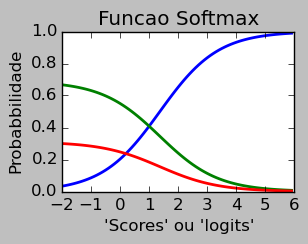

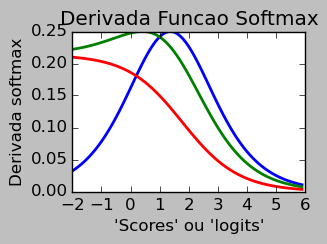

In [41]:
def softmax(x):
    aux = np.exp(x)
    return (aux.T/aux.sum(axis = 1)).T

x2 = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x2, np.ones_like(x2), 0.2 * np.ones_like(x2)]).T
psoftmax = softmax(scores)
aux  =np.exp(scores)
aux2 = aux.sum(axis =1).reshape(aux.shape[0],-1) 
dsoftmax = (aux*aux2 - np.power(aux,2))/(np.power(aux2,2))

plt.figure(figsize=(3,2))
plt.plot(x2, psoftmax, linewidth=2)
plt.xlabel("'Scores' ou 'logits'")
plt.ylabel("Probabbilidade")
plt.title("Funcao Softmax")
plt.show()

plt.figure(figsize=(3,2))
plt.plot(x2, dsoftmax, linewidth=2)
plt.xlabel("'Scores' ou 'logits'")
plt.ylabel("Derivada softmax")
plt.title("Derivada Funcao Softmax")
plt.show()

Veja abaixo dois exemplos interativos do que acontece com a função softmax quando modificamos os valores dos scores.

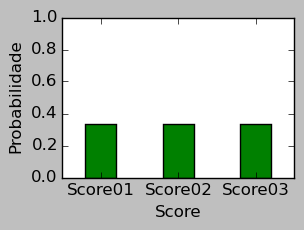

<function __main__.plotmodel>

In [40]:
def plotmodel(s1,s2,s3):
    scores = np.array([[s1, s2, s3]])
    psoftmax2 = softmax(scores).ravel()
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(3, 2))
    people = ('Score01', 'Score02', 'Score03')
    x_pos = [2,4,6]
    ax.bar(x_pos, psoftmax2, align='center',color='green', ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(people)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_ylim([0,1])
    ax.set_xlabel('Score')
    ax.set_ylabel('Probabilidade')
    plt.show()
                       
interact(plotmodel,s1 = (1,10,1),s2 = (1,10,1),s3 = (1,10,1))
                       


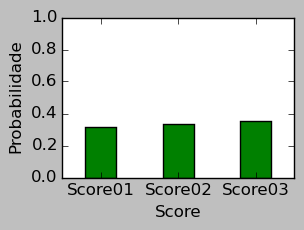

In [34]:
def plotmodel2(M, op):
    scores = np.array([[5, 5.5, 6]])
    if op == 1:
        psoftmax2 = softmax(scores*M).ravel()
    else:
        psoftmax2 = softmax(scores/M).ravel()
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(3, 2))
    people = ('Score01', 'Score02', 'Score03')
    x_pos = [2,4,6]
    ax.bar(x_pos, psoftmax2, align='center',color='green', ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(people)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_ylim([0,1])
    ax.set_xlabel('Score')
    ax.set_ylabel('Probabilidade')
    plt.show()
                       
interact(plotmodel2,M = (1,10,1),op = {'Multiplication':1,'Division':2})
                       